# **Implementacion de automata celular de segundo orden**
**Flores Estopier Rodrigo**

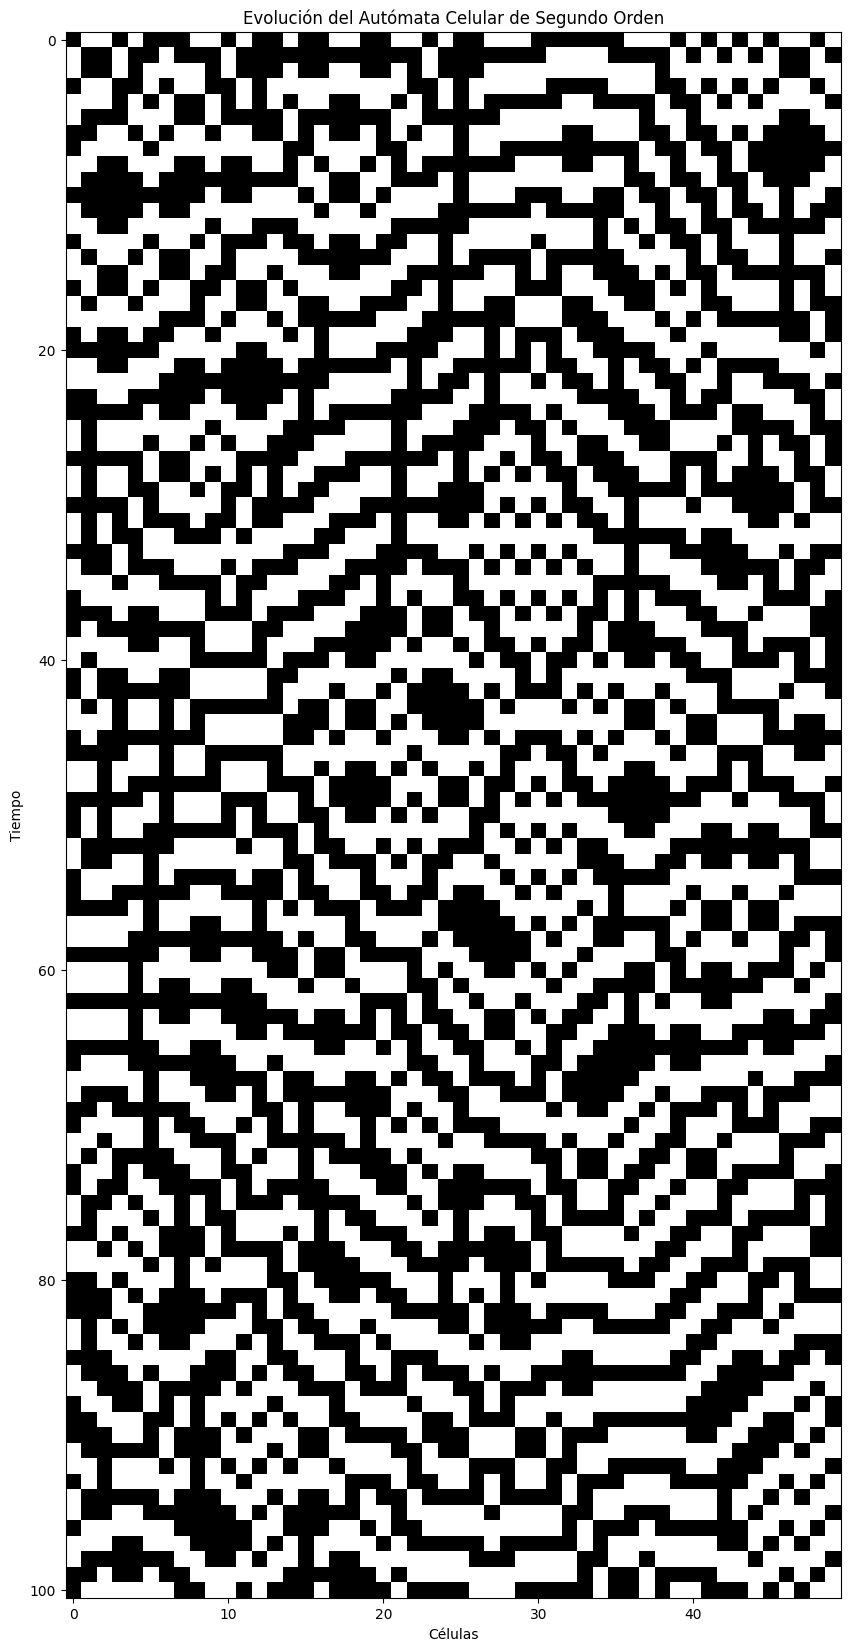

In [ ]:
import matplotlib.pyplot as plt
import random

def apply_rule(rule_number, neighborhood):
    """
    Aplica la regla del autómata celular ordinario.
    :param rule_number: Número de la regla (0-255).
    :param neighborhood: Vecindario de la célula (lista de 3 elementos).
    :return: Nuevo estado de la célula.
    """
    binary_rule = f"{rule_number:08b}"
    index = 7 - int("".join(map(str, neighborhood)), 2)
    #print("Regla: ", binary_rule)
    #print("Vecindario: ", "".join(map(str, neighborhood)))
    #print("vecindario int: ", int("".join(map(str, neighborhood)), 2))
    #print("Index: ", index)
    #print("Resultado: ", int(binary_rule[index]))
    return int(binary_rule[index])

def printState(state):
    for i in state:
        print(i, end="")
    print()

def second_order_automaton(initial_state, rule_number, steps):
    """
    Ejecuta el autómata celular de segundo orden.
    :param initial_state: Estado inicial del autómata (lista de 0s y 1s).
    :param rule_number: Número de la regla (0-255).
    :param steps: Número de pasos a ejecutar.
    :return: Lista de estados del autómata en cada paso.
    """
    current_state = initial_state[:]
    previous_state = [0] * len(initial_state)
    history = [current_state[:]]
    #printState(current_state)

    for _ in range(steps):
        new_state = []
        for i in range(len(current_state)):
            neighborhood = [
                current_state[(i - 1) % len(current_state)],
                current_state[i],
                current_state[(i + 1) % len(current_state)]
            ]
            ordinary_ca_state = apply_rule(rule_number, neighborhood)
            new_state.append(previous_state[i] ^ ordinary_ca_state)
        
        previous_state = current_state[:]
        current_state = new_state[:]
        #printState(current_state)
        history.append(current_state[:])

    return history

def plot_automaton(history):
    """
    Muestra la evolución del autómata celular en una gráfica.
    :param history: Lista de estados del autómata en cada paso.
    """
    plt.figure(figsize=(10, len(history) / 2))
    plt.imshow(history, cmap='binary', interpolation='nearest')
    plt.xlabel('Células')
    plt.ylabel('Tiempo')
    plt.title('Evolución del Autómata Celular de Segundo Orden')
    plt.show()


# Definir el estado inicial y la regla
#initial_state = [0,0,0,1,0,1,0,0,1,0,1,0,0,0,0 ]
#Estado inicial aleatorio
#initial_state = [random.randint(0,1) for _ in range(50)]
#Genera un estado inicial con 1 en el centro
initial_state = [0] * 50
initial_state[25] = 1
rule_number = int(input("Introduce el número de la regla (0-255): "))
steps = int(input("Introduce el número de pasos a ejecutar: "))

# Ejecutar el autómata celular de segundo orden
history = second_order_automaton(initial_state, rule_number, steps)

# Mostrar el resultado en una gráfica
plot_automaton(history)